# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

## 导入数据

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
import statsmodels.api as sm
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
titanic_train_original = pd.read_csv("./titanic_train.csv")
titanic_test_original = pd.read_csv("./titanic_test.csv")

## 清洗数据

In [3]:
titanic_train_original

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### **结构检查**

In [4]:
titanic_train_original

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic_test_original

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


结构无问题

#### **内容清洗**

**数据类型检查**

In [6]:
titanic_train_clean = titanic_train_original.copy()
titanic_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


`Age` `Cabin` `Embarked` 有空缺值，需要进行评估  
`Survived`(是否幸存) `Pclass`（船舱等级） `embarked`（登录口岸），是分类数据所以将数据类型转成"category"  
`PassengerId` 转换为字符串

In [7]:
titanic_train_clean["PassengerId"] = titanic_train_clean["PassengerId"].astype(str) 
titanic_train_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
titanic_train_clean["Survived"] = titanic_train_clean["Survived"].astype("category")
titanic_train_clean["Pclass"] = titanic_train_clean["Pclass"].astype("category")
titanic_train_clean["Embarked"] = titanic_train_clean["Embarked"].astype("category")
titanic_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(3), float64(2), int64(2), object(5)
memory usage: 65.8+ KB


**检查缺失值对应的观察值情况**

In [9]:
titanic_train_clean[titanic_train_clean["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


缺失的年龄观察值中含有关键数据，所以年龄缺失行不能删除，对年龄缺失值进行平均值填充

In [10]:
Age_mean = titanic_train_clean["Age"].mean()
titanic_train_clean["Age"] = titanic_train_clean["Age"].fillna(Age_mean)
titanic_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(3), float64(2), int64(2), object(5)
memory usage: 65.8+ KB


Cabin与船舱等级属于同类数据，说Cabin的缺失值不做处理  
针对`Embarked`数据进行评估

In [11]:
titanic_train_clean[titanic_train_clean["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


`Embarked`数据的缺失值只有两个，对应观察值里都是关键数据，且认为`Embarked`数据对是否幸存不产生影响，所以不做处理

**检查重复数据**

In [12]:
titanic_train_clean.duplicated().sum()

0

无重复数据

**检查不一致数据**（主要针对分类数据）

In [13]:
titanic_train_clean["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
titanic_train_clean["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [15]:
titanic_train_clean["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

无不一致数据

**检查数值数据是否存在不合理数值**

In [16]:
titanic_train_clean.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


数值数据没有不合理数值

## 探索数据

#### **剔除明显对幸存结果无影响的数据**

In [17]:
sns.set_palette("pastel")
titanic_train_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


剔除明显对是否幸存无影响的自变量

In [18]:
titanic_train_analyze_data = titanic_train_clean.drop(["Name","Ticket","Cabin","Embarked"],axis=1)
titanic_train_analyze_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.000000,1,0,7.2500
1,2,1,1,female,38.000000,1,0,71.2833
2,3,1,3,female,26.000000,0,0,7.9250
3,4,1,1,female,35.000000,1,0,53.1000
4,5,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000
887,888,1,1,female,19.000000,0,0,30.0000
888,889,0,3,female,29.699118,1,2,23.4500
889,890,1,1,male,26.000000,0,0,30.0000


#### **查看幸存比例**

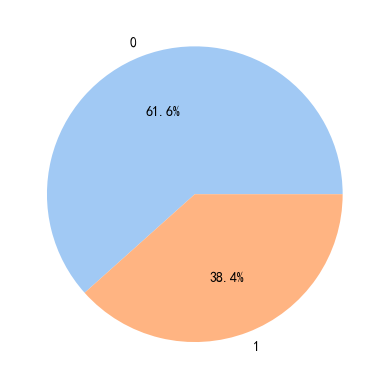

In [19]:
Survived_num = titanic_train_analyze_data["Survived"].value_counts()
Survived_labels = Survived_num.index
plt.pie(Survived_num,labels = Survived_labels,autopct = "%.1f%%")
plt.show()

从比例上看到幸存者占少数不足一半

#### **查看各等级客舱占比，与幸存的关系**

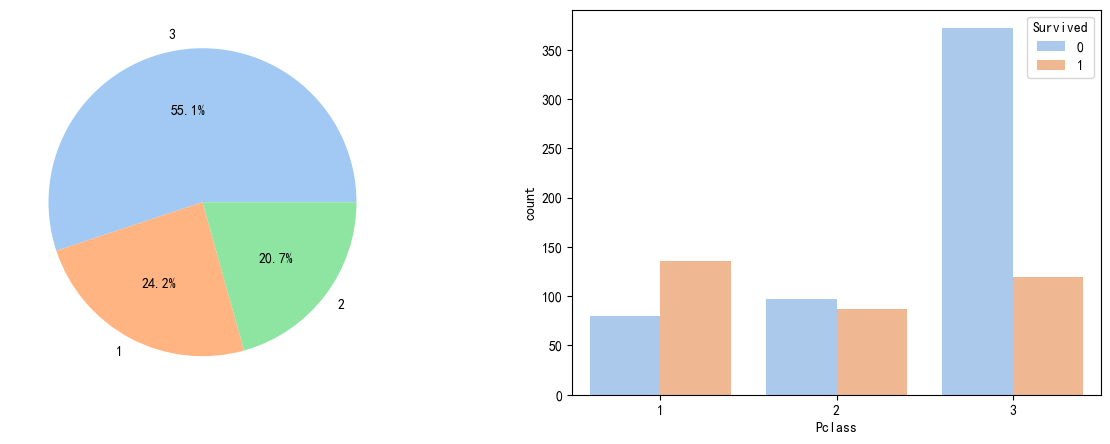

In [20]:
fig,axes = plt.subplots(1,2,figsize = (15,5))
Pclass_num = titanic_train_analyze_data["Pclass"].value_counts()
Pclass_labels = Pclass_num.index
axes[0].pie(Pclass_num,labels = Pclass_labels,autopct = "%.1f%%")
sns.countplot(data=titanic_train_analyze_data,x = "Pclass",hue = "Survived",ax = axes[1])
plt.show()

可以看出客舱等级越高幸存的比例越高

#### **查看性别占比，与幸存的关系**

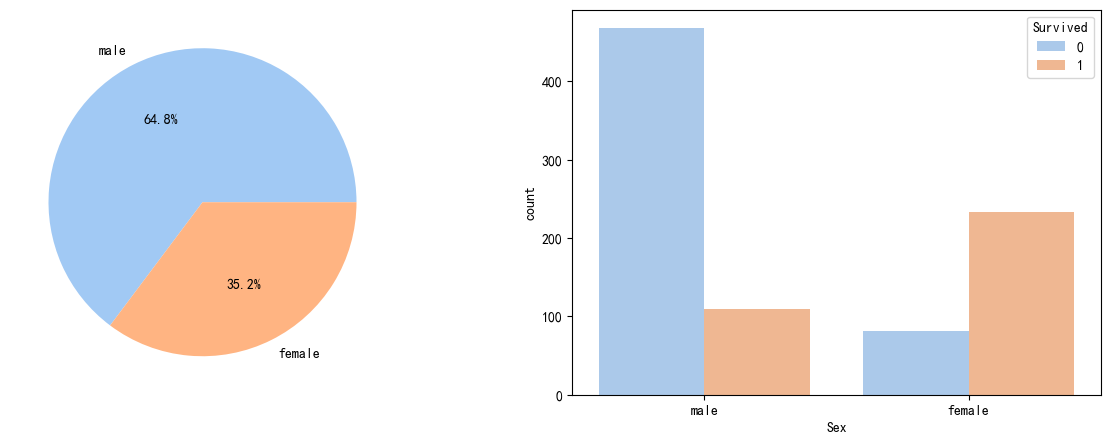

In [21]:
fig,axes = plt.subplots(1,2,figsize = (15,5))
Sex_num = titanic_train_analyze_data["Sex"].value_counts()
Sex_labels = Sex_num.index
axes[0].pie(Sex_num,labels = Sex_labels,autopct = "%.1f%%")
sns.countplot(data=titanic_train_analyze_data,x = "Sex",hue = "Survived",ax = axes[1])
plt.show()

女性幸存的比例高于男性

#### **查看各年龄段占比，与幸存的关系**

对年龄分段

In [22]:
titanic_train_analyze_data.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [23]:
number_leave = [0,10,20,30,40,50,60,70,80]
titanic_train_analyze_data["Age_leave"] = pd.cut(titanic_train_analyze_data["Age"],number_leave)

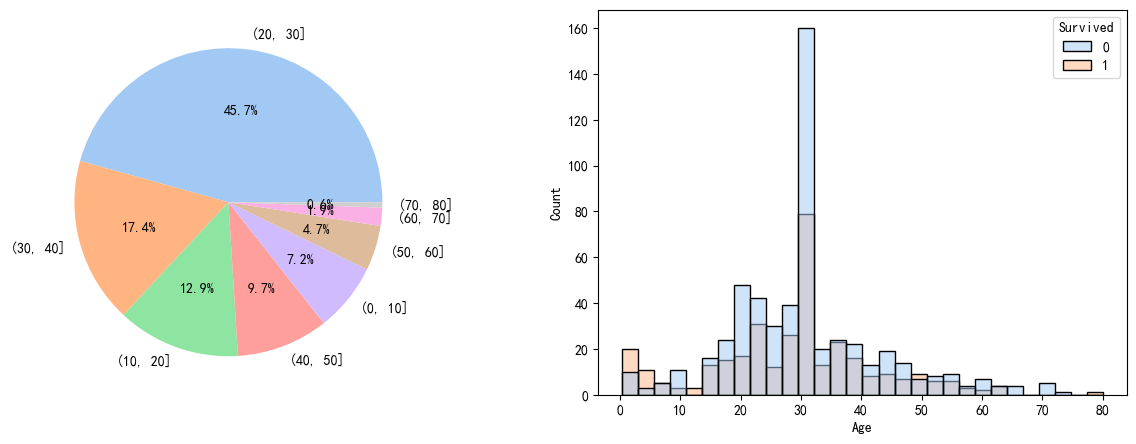

In [24]:
fig,axes = plt.subplots(1,2,figsize = (15,5))
Age_num = titanic_train_analyze_data["Age_leave"].value_counts()
Age_labels = Age_num.index
axes[0].pie(Age_num,labels = Age_labels,autopct = "%.1f%%")
sns.histplot(data=titanic_train_analyze_data,x = "Age",hue = "Survived",ax = axes[1])
plt.show()

可以看出整体年龄分布偏年轻集中在20-40岁，有少数超过65岁的极端值，10岁以下的幸存比例较高，30岁的遇难人数最多

#### **查看家庭成员数量与幸存的关系**

**`SibSp` `Parch`数据可以整合为家庭成员人数`Family_member`的数据**

In [25]:
titanic_train_analyze_data["Family_member"] = titanic_train_analyze_data["SibSp"] + titanic_train_analyze_data["Parch"]
titanic_train_analyze_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_leave,Family_member
0,1,0,3,male,22.000000,1,0,7.2500,"(20, 30]",1
1,2,1,1,female,38.000000,1,0,71.2833,"(30, 40]",1
2,3,1,3,female,26.000000,0,0,7.9250,"(20, 30]",0
3,4,1,1,female,35.000000,1,0,53.1000,"(30, 40]",1
4,5,0,3,male,35.000000,0,0,8.0500,"(30, 40]",0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,"(20, 30]",0
887,888,1,1,female,19.000000,0,0,30.0000,"(10, 20]",0
888,889,0,3,female,29.699118,1,2,23.4500,"(20, 30]",3
889,890,1,1,male,26.000000,0,0,30.0000,"(20, 30]",0


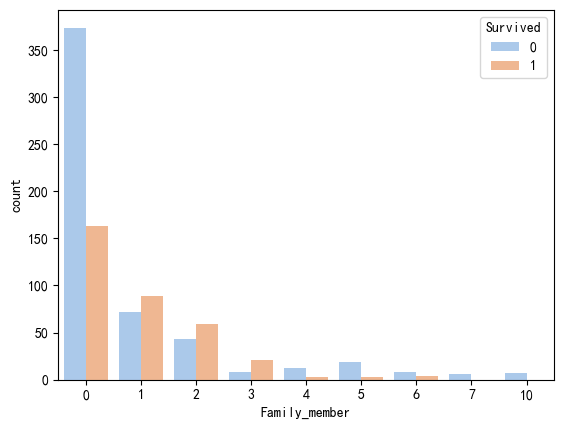

In [26]:
sns.countplot(data=titanic_train_analyze_data,x = "Family_member",hue = "Survived")
plt.show()

可以看出当家庭成员在1~3人时幸存比例会增加，但超过3人幸存比例就会下降

#### **查看票价的分布情况和票价与幸存的关系**

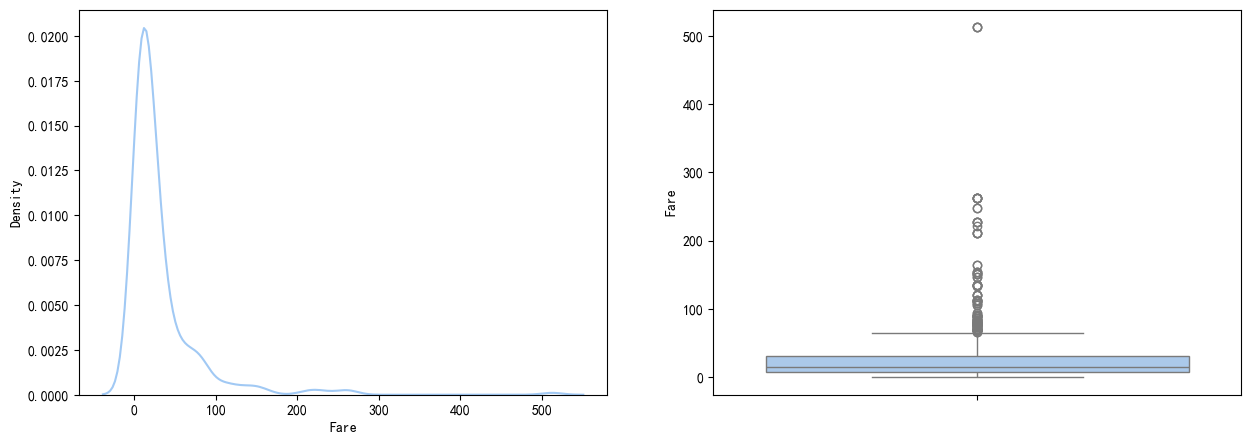

In [27]:
fig,axes = plt.subplots(1,2,figsize = (15,5))
sns.kdeplot(titanic_train_analyze_data["Fare"],ax = axes[0])
sns.boxplot(titanic_train_analyze_data["Fare"],ax = axes[1])
plt.show()

可以看出大部分票价都在100元以下，是一些票价极端值拉高了整体平均值

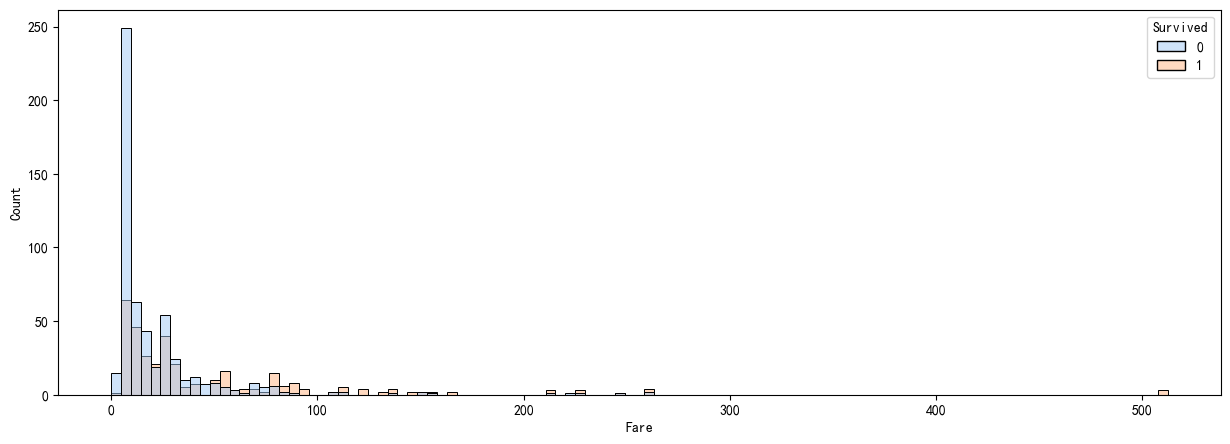

In [28]:
fig,axes = plt.subplots(1,1,figsize = (15,5))
sns.histplot(data=titanic_train_analyze_data,x = "Fare",hue = "Survived")
plt.show()

可以看出票价越低的幸存比例越低

## 分析数据

In [29]:
titanic_train_analyze_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_leave,Family_member
0,1,0,3,male,22.000000,1,0,7.2500,"(20, 30]",1
1,2,1,1,female,38.000000,1,0,71.2833,"(30, 40]",1
2,3,1,3,female,26.000000,0,0,7.9250,"(20, 30]",0
3,4,1,1,female,35.000000,1,0,53.1000,"(30, 40]",1
4,5,0,3,male,35.000000,0,0,8.0500,"(30, 40]",0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,"(20, 30]",0
887,888,1,1,female,19.000000,0,0,30.0000,"(10, 20]",0
888,889,0,3,female,29.699118,1,2,23.4500,"(20, 30]",3
889,890,1,1,male,26.000000,0,0,30.0000,"(20, 30]",0


#### **剔除`"Age_leave","SibSp","Parch","PassengerId"`，将分类变量转换为虚拟变量**

In [30]:
titanic_train_analyze = titanic_train_analyze_data.drop(["Age_leave","SibSp","Parch","PassengerId"],axis=1)
titanic_train_analyze_clean = pd.get_dummies(data = titanic_train_analyze, columns = ["Sex","Pclass"], dtype = int , drop_first = True)
titanic_train_analyze_clean

,Survived,Age,Fare,Family_member,Sex_male,Pclass_2,Pclass_3
0,0,22.000000,7.2500,1,1,0,1
1,1,38.000000,71.2833,1,0,0,0
2,1,26.000000,7.9250,0,0,0,1
3,1,35.000000,53.1000,1,0,0,0
4,0,35.000000,8.0500,0,1,0,1
...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,1,0
887,1,19.000000,30.0000,0,0,0,0
888,0,29.699118,23.4500,3,0,0,1
889,1,26.000000,30.0000,0,1,0,0


#### **定义自变量和因变量**

In [31]:
y = titanic_train_analyze_clean["Survived"]
x = titanic_train_analyze_clean[["Age","Fare","Family_member","Sex_male","Pclass_2","Pclass_3"]]

#### **检验自变量相关性**

[]

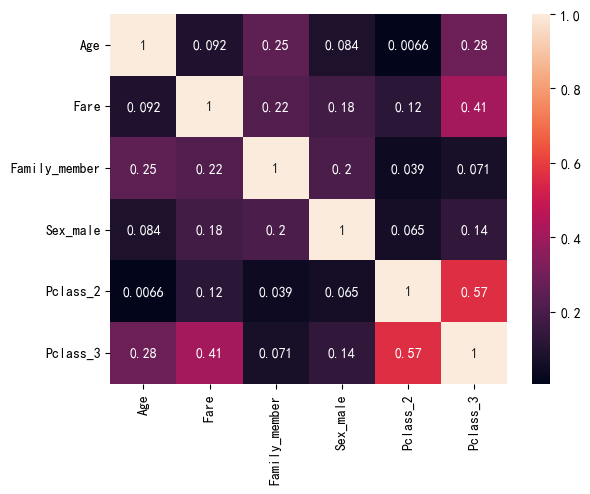

In [32]:
sns.heatmap(x.corr().abs(), annot = True)
plt.plot()

没有相关系数大于0.8的自变量，数据可用

**传入截距**

In [33]:
x = sm.add_constant(x)

#### **建立逻辑回归模型**

In [34]:
result = sm.Logit(y,x).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Thu, 07 Mar 2024   Pseudo R-squ.:                  0.3339
Time:                        11:08:58   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.8097      0.445      8.568      0.000       2.938       4.681
Age              -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare              0.0032      0.002      1.311      0.190      -0.002       0.008
Family_member    -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Sex_male         -2.7759      0.199    -13.980      0.000      -3.165      -2.387
Pclass_2         -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3         -2.1324      0.289     -7.373      0.000      -2.699      -1.566
=================================================================================
"""

`Fare`的P值大于0.05，需要剔除

In [35]:
x = titanic_train_analyze_clean[["Age","Family_member","Sex_male","Pclass_2","Pclass_3"]]
x = sm.add_constant(x)

In [36]:
result = sm.Logit(y,x).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Thu, 07 Mar 2024   Pseudo R-squ.:                  0.3323
Time:                        11:08:58   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.0620      0.404     10.049      0.000       3.270       4.854
Age              -0.0395      0.008     -5.065      0.000      -0.055      -0.024
Family_member    -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Sex_male         -2.7854      0.198    -14.069      0.000      -3.173      -2.397
Pclass_2         -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3         -2.3458      0.242     -9.676      0.000      -2.821      -1.871
=================================================================================
"""

P值全部符合条件，模型可用

#### **计算自然常数的次方，查看每个变量对结果的影响**

In [37]:
print(f"年龄每增加1岁幸存概率降低{1-np.exp(-0.0395):.2f}")
print(f"家庭成员每增加1个幸存概率降低{1-np.exp(-0.2186):.2f}")
print(f"性别为男幸存概率降低{1-np.exp(-2.7854):.2f}")
print(f"二等舱幸存概率比一等舱低{1-np.exp(-1.1798):.2f}")
print(f"三等舱幸存概率比一等舱低{1-np.exp(-2.3458):.2f}")

年龄每增加1岁幸存概率降低0.04
家庭成员每增加1个幸存概率降低0.20
性别为男幸存概率降低0.94
二等舱幸存概率比一等舱低0.69
三等舱幸存概率比一等舱低0.90


## 预测数据

#### **清洗预测数据**

In [38]:
titanic_test_analyze = titanic_test_original.copy()
titanic_test_analyze

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


结构检查

In [39]:
titanic_test_analyze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Age Fare Cabin 数据有缺失，Fare Cabin 不是关键数据不做操作，Age数据同样用平均值填充

In [40]:
titanic_test_analyze["Age"] = titanic_test_analyze["Age"].fillna(titanic_test_analyze["Age"].mean())
titanic_test_analyze.isnull().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

将PassengerId转换为索引，以便预测结果匹配姓名

In [41]:
titanic_test_analyze = titanic_test_analyze.set_index("PassengerId")
titanic_test_analyze

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


将Pclass Sex 数据类型转为category

In [42]:
titanic_test_analyze["Pclass"] = titanic_test_analyze["Pclass"].astype("category")
titanic_test_analyze["Sex"] = titanic_test_analyze["Sex"].astype("category")
titanic_test_analyze.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       418 non-null    float64 
 4   SibSp     418 non-null    int64   
 5   Parch     418 non-null    int64   
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    object  
dtypes: category(2), float64(2), int64(2), object(4)
memory usage: 30.5+ KB


将SibSp Parch 合并为Family_member

In [43]:
titanic_test_analyze["Family_member"] = titanic_test_analyze["SibSp"] + titanic_test_analyze["Parch"]
titanic_test_analyze

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_member
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S,0
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,0
1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0


#### **将模型的完整分类传入预测数据**

In [44]:
titanic_test_analyze["Pclass"] = pd.Categorical(titanic_test_analyze["Pclass"],categories = ["1","2","3"])
titanic_test_analyze["Sex"] = pd.Categorical(titanic_test_analyze["Sex"],categories = ["male","female"])

In [45]:
titanic_test_analyze = pd.get_dummies(data = titanic_test_analyze, columns = ["Sex","Pclass"], dtype = int)
titanic_test_analyze

,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_member,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,
892,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,NaN,Q,0,1,0,0,0,0
893,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,NaN,S,1,0,1,0,0,0
894,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,NaN,Q,0,1,0,0,0,0
895,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,NaN,S,0,1,0,0,0,0
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,NaN,S,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,NaN,S,0,1,0,0,0,0
1306,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,C105,C,0,0,1,0,0,0
1307,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,0,0,0,0


#### **定义预测数据自变量**

In [46]:
result.params

const            4.061982
Age             -0.039495
Family_member   -0.218627
Sex_male        -2.785398
Pclass_2        -1.179763
Pclass_3        -2.345823
dtype: float64

In [47]:
x_test = titanic_test_analyze[["Age","Family_member","Sex_male","Pclass_2","Pclass_3"]]
x_test = sm.add_constant(x_test)

#### **预测结果**

In [48]:
test_survival = result.predict(x_test)
test_survival

PassengerId
892     0.478514
893     0.879434
894     0.236473
895     0.552361
896     0.940242
          ...   
1305    0.520230
1306    0.925647
1307    0.439306
1308    0.520230
1309    0.411858
Length: 418, dtype: float64

幸存概率超过0.5的人员我们分类为幸存

In [49]:
test_survival_data = test_survival > 0.5

In [50]:
test_survival_data.value_counts()

True     316
False    102
Name: count, dtype: int64

预测结果幸存人数316人，遇难人数102人

#### **将预测结果转换为DataFrame并根据ID索引与原表合并，匹配上幸存人员信息**

In [51]:
test_survival_df = pd.DataFrame({"survival":test_survival_data})
test_survival_df

,survival
PassengerId,
892,False
893,True
894,False
895,True
896,True
...,...
1305,True
1306,True
1307,False


In [52]:
titanic_test_1 = titanic_test_original.copy()

In [53]:
titanic_test_1 = titanic_test_1.set_index("PassengerId")

In [54]:
titanic_test_survival = titanic_test_1.join(test_survival_df,how = "outer")
titanic_test_survival

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survival
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,True
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,True
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,True
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,True
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,True
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False
